In [3]:
import tensorflow
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import imgaug.augmenters as iaa

2023-10-03 19:16:22.475247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 19:16:22.521736: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 19:16:22.522450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 19:16:24.127004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [41]:
imagem = cv2.imread("/home/raissa/demo/notebookenv/novo2/dataset-teste/nota5/IMG_20230813_171545.jpg", cv2.IMREAD_GRAYSCALE)
imagem = cv2.resize(imagem, (250, 250)) 

_, thresh_to_zero = cv2.threshold(imagem, 150, 255, cv2.THRESH_TOZERO)

nome_novo_arquivo = "processada.jpg"
caminho_novo_arquivo = os.path.join("/home/raissa/demo/notebookenv/novo2/", nome_novo_arquivo)
cv2.imwrite(caminho_novo_arquivo, thresh_to_zero)

True

In [42]:
quantidade_dimensoes = imagem.ndim

print(f"A imagem tem {quantidade_dimensoes} dimensões.")

A imagem tem 2 dimensões.


In [43]:
def verifica_dimensoes(imagem):
    if imagem.ndim == 3:
        # A imagem é colorida (tem 3 dimensões)
        altura, largura, canais = imagem.shape
        print(f"A imagem tem {canais} canais.")
    elif imagem.ndim == 2:
        # A imagem é em escala de cinza (tem 2 dimensões)
        altura, largura = imagem.shape
        print("A imagem é em escala de cinza (1 canal).")
    else:
        # A imagem tem um número inesperado de dimensões
        print("A imagem tem um número inesperado de dimensões.")

In [44]:
verifica_dimensoes(imagem)

A imagem é em escala de cinza (1 canal).


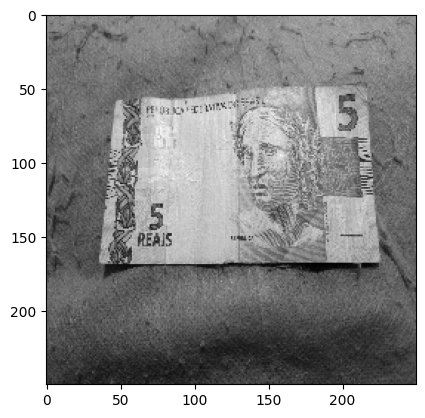

In [45]:
plt.imshow(imagem, cmap='gray')

In [46]:
print(imagem)

[[102 111 103 ... 121 129 124]
 [ 92 115 109 ... 119 123 126]
 [106 109 116 ... 119 126 121]
 ...
 [ 49  60  55 ...  57  65  62]
 [ 60  61  38 ...  58  70  73]
 [ 50  52  51 ...  58  67  70]]


In [47]:
imagem = cv2.imread("/home/raissa/demo/notebookenv/novo2/processada.jpg", cv2.IMREAD_GRAYSCALE)
#imagem = cv2.resize(imagem, (250, 250))  # Redimensione para 28x28 se necessário

In [48]:
verifica_dimensoes(imagem)

A imagem é em escala de cinza (1 canal).


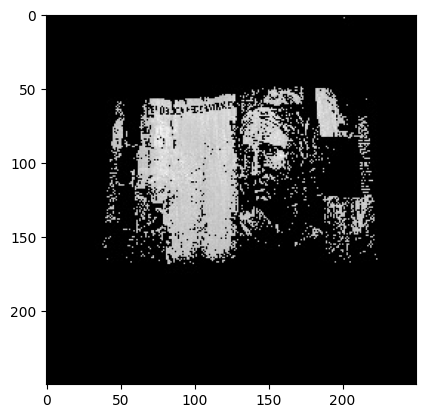

In [49]:
plt.imshow(imagem, cmap='gray')

In [34]:
print(imagem)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
def processa_imagem(caminho_imagem):
    imagem_original = cv2.imread(caminho_imagem, cv2.IMREAD_COLOR)

    # Converte a imagem para escala de cinza
    imagem_cinza = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2GRAY)

    thresh_to_zero = cv2.adaptiveThreshold(imagem_cinza,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,3)
    
    # Limiarização da imagem usando cv2.THRESH_TOZERO com um valor de limiar de 160
    _, binaria = cv2.threshold(thresh_to_zero, 200, 255, cv2.THRESH_BINARY)

    print(binaria)
    
    constrastada = binaria * 10
    
    # Encontra contornos na imagem limiarizada
    contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Encontra o maior contorno
    maior_contorno = max(contornos, key=cv2.contourArea)

    # Cria uma máscara preta do mesmo tamanho que a imagem original e do tipo CV_8U
    mascara = np.zeros_like(imagem_cinza, dtype=np.uint8)

    # Preenche o maior contorno na máscara com branco
    cv2.drawContours(mascara, [maior_contorno], -1, (255), thickness=cv2.FILLED)

    # Aplica a máscara na imagem original para extrair a parte destacada
    parte_destaque = cv2.bitwise_and(imagem_original, imagem_original, mask=mascara)

    # Exibe as imagens usando Matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(imagem_cinza, cmap='gray')
    plt.title('Imagem em Escala de Cinza')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(thresh_to_zero, cmap='gray')
    plt.title('Imagem Limiarizada (THRESH_TOZERO)')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(mascara, cmap='gray')
    plt.title('Máscara do Contorno')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(parte_destaque, cv2.COLOR_BGR2RGB))
    plt.title('Parte Destacada do Polígono')
    plt.axis('off')
    
    plt.subplot(2, 3, 6)
    plt.imshow(constrastada, cmap='gray')
    plt.title('Imagem Contrastada (THRESH_TOZERO)')
    plt.axis('off')


    plt.tight_layout()
    plt.show()

[[  0 255   0 ... 255 255 255]
 [  0 255   0 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0 255 255 ... 255 255   0]
 [255 255 255 ... 255   0   0]
 [255 255 255 ... 255 255   0]]


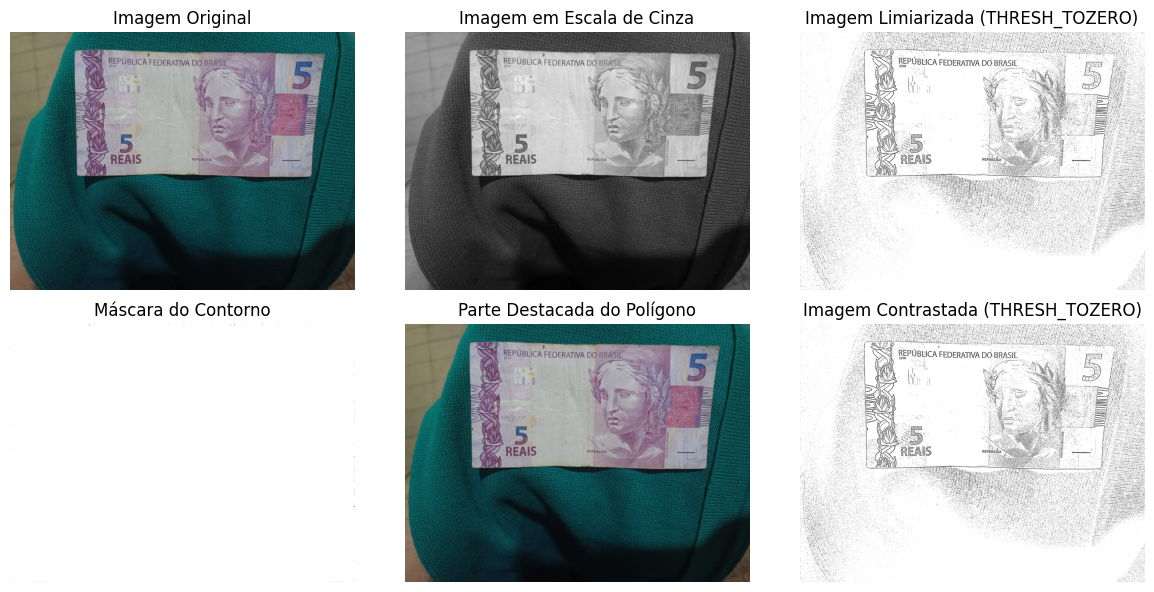

In [44]:
processa_imagem("/home/raissa/demo/notebookenv/novo2/dataset-teste/nota5/IMG_20230813_173839.jpg")

In [21]:
x, y, largura, altura = cv2.boundingRect(maior_contorno)

# Encontra o tamanho do lado do quadrado
tamanho_lado = max(largura, altura)

# Calcula as novas coordenadas para o quadrado
novo_x = x + (largura - tamanho_lado) // 2
novo_y = y + (altura - tamanho_lado) // 2

# Ajusta o retângulo delimitador para ser um quadrado
novo_largura = tamanho_lado
novo_altura = tamanho_lado

# Recorta a parte destacada em formato quadrado
parte_recortada_quadrado = parte_destaque[novo_y:novo_y+novo_altura, novo_x:novo_x+novo_largura]

# Exibe a imagem recortada
plt.imshow(cv2.cvtColor(parte_recortada_quadrado, cv2.COLOR_BGR2RGB))
plt.title('Parte Destacada Recortada')
plt.axis('off')
plt.show()

NameError: name 'maior_contorno' is not defined

In [ ]:
imagem = cv2.resize(parte_recortada_quadrado, (250, 250)) 

In [7]:
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

NameError: name 'imagem' is not defined

In [ ]:
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)